In [2]:
import pandas
import matplotlib.pyplot as plt 

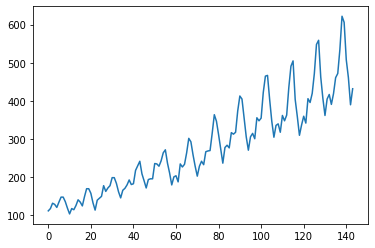

In [3]:
dataset=pandas.read_csv('data.csv',usecols=[1])
plt.plot(dataset)
plt.show()

In [4]:
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
np.random.seed(7)


In [5]:
dataset=dataset.values.astype('float32')



In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(len(dataset))

dataset

144


array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [7]:
train,test=train_test_split(dataset,test_size=0.33,shuffle=False)
print(train,len(test))

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 ]
 [0.24

In [8]:
def create_dataset(dataset,look_back=1):
    #dataset=tf.squeeze(dataset)
    X=[]
    y=[]
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:i+look_back,0])
        y.append(dataset[i+look_back,0])
    return np.array(X),np.array(y)

In [9]:
look_back=3
X_train,y_train=create_dataset(train,look_back)
X_test,y_test=create_dataset(test,look_back)
for i in range(len(X_train)):
    print(X_train[i],":",y_train[i])


[0.01544401 0.02702703 0.05405405] : 0.04826255
[0.02702703 0.05405405 0.04826255] : 0.032818526
[0.05405405 0.04826255 0.03281853] : 0.059845567
[0.04826255 0.03281853 0.05984557] : 0.08494207
[0.03281853 0.05984557 0.08494207] : 0.08494207
[0.05984557 0.08494207 0.08494207] : 0.06177607
[0.08494207 0.08494207 0.06177607] : 0.02895753
[0.08494207 0.06177607 0.02895753] : 0.0
[0.06177607 0.02895753 0.        ] : 0.027027026
[0.02895753 0.         0.02702703] : 0.021235526
[0.         0.02702703 0.02123553] : 0.042471036
[0.02702703 0.02123553 0.04247104] : 0.07142857
[0.02123553 0.04247104 0.07142857] : 0.059845567
[0.04247104 0.07142857 0.05984557] : 0.040540546
[0.07142857 0.05984557 0.04054055] : 0.08687258
[0.05984557 0.04054055 0.08687258] : 0.12741312
[0.04054055 0.08687258 0.12741312] : 0.12741312
[0.08687258 0.12741312 0.12741312] : 0.10424709
[0.12741312 0.12741312 0.10424709] : 0.055984557
[0.12741312 0.10424709 0.05598456] : 0.01930502
[0.10424709 0.05598456 0.01930502] : 0.

In [10]:
# reshape input to shape [samples,time_steps,features]
X_train=np.reshape(X_train,(X_train.shape[0],look_back,-1))
X_test=np.reshape(X_test,(X_test.shape[0],look_back,-1))
print(X_train.shape)
print(X_test.shape)

(93, 3, 1)
(45, 3, 1)


In [14]:
batch_size=3
model=Sequential()
model.add(LSTM(4,batch_input_shape=(batch_size,look_back,1),stateful=True))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
for epoch in range(100):    
    model.fit(X_train,y_train,batch_size=batch_size,epochs=1,verbose=1,shuffle=False)
    model.reset_states()


31/31 [==============================] - 0s 6ms/step - loss: 0.0032


In [15]:
trainPred=scaler.inverse_transform(model.predict(X_train,batch_size=batch_size)) 
testPred=scaler.inverse_transform(model.predict(X_test,batch_size=batch_size))
y_train=scaler.inverse_transform([y_train]).T
y_test=scaler.inverse_transform([y_test]).T
print(trainPred.shape)
print(y_train.shape)
trainScore = math.sqrt(mean_squared_error(y_train[:,0], trainPred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], testPred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


(93, 1)
(93, 1)
Train Score: 28.89 RMSE
Test Score: 65.55 RMSE


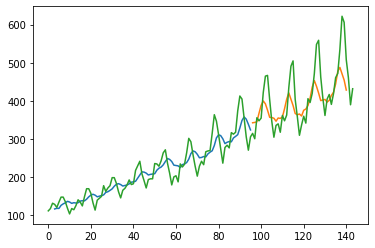

In [16]:
trainPlot=np.empty_like(dataset)
trainPlot[look_back:look_back+len(trainPred)]=trainPred
trainPlot[look_back+len(trainPred):]=None
trainPlot[0:look_back]=None
testPlot=np.empty_like(dataset)
testPlot[look_back+len(trainPred):-look_back]=testPred
testPlot[:look_back+len(trainPred)]=None
testPlot[-look_back:]=None
plt.plot(trainPlot)
plt.plot(testPlot)
plt.plot(scaler.inverse_transform(dataset))
plt.show()